In [37]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

In [38]:
data = pd.read_csv('salary.csv')

In [39]:
data.head(25)

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1
5,56000.0,1,0,0,1.19,1,0,1,1,1,0
6,61008.0,0,2,2,1.33,1,0,1,1,2,0
7,39986.0,0,2,0,0.99,1,0,1,1,4,0
8,36308.0,0,2,1,0.85,1,0,1,1,1,1
9,55000.0,0,0,0,1.23,1,0,1,1,1,1


In [40]:
data = data[['salary', 'yearsworked']]

data = data.dropna(axis=0, how='any')

In [41]:
data.head()

,salary,yearsworked
0,53000.0,0
1,58000.0,0
2,45500.0,0
3,35782.0,2
4,34731.0,2


In [42]:
data.describe()

,salary,yearsworked
count,513.000000,513.000000
mean,50863.220098,12.836257
std,12685.132358,9.447040
min,29000.000000,0.000000
25%,40000.000000,4.000000
50%,50096.000000,12.000000
75%,60345.000000,22.000000
max,96156.000000,41.000000


# Split the data

In [43]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=10)

In [44]:
len(train)

410

In [45]:
len(test)

103

# EDA

In [46]:
y = train['salary']
x1 = train['yearsworked']

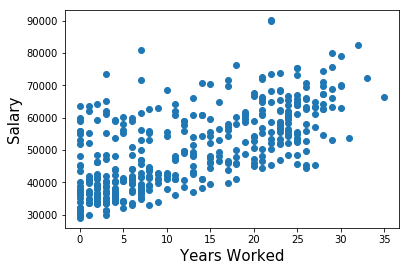

In [47]:
plt.scatter(x1,y)
plt.xlabel('Years Worked', fontsize = 15)
plt.ylabel('Salary', fontsize = 15)
plt.show()

In [48]:
x = sm.add_constant(x1)

# Regression

In [65]:
x = sm.add_constant(x1)
 
results = sm.OLS(y,x).fit()
 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     329.6
Date:                Fri, 17 May 2019   Prob (F-statistic):           2.04e-54
Time:                        11:14:28   Log-Likelihood:                -4326.1
No. Observations:                 410   AIC:                             8656.
Df Residuals:                     408   BIC:                             8664.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.912e+04    753.736     51.898      0.000    3.76e+04    4.06e+04
yearsworked   879.6787     48.454     18.155      0.000     784.428     974.930
==============================================================================
Omnibus:                       54.937   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.817
Skew:                           0.965   Prob(JB):                     9.35e-17
Kurtosis:                       3.772   Cond. No.                         25.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Visualization

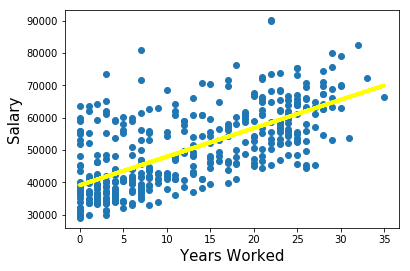

In [50]:
plt.scatter(x1,y)
 
yhat = 879.678668*x1 + 39117.437006
 
fig = plt.plot(x1,yhat, lw=4, c='yellow', label = 'regression line')
 
plt.xlabel('Years Worked', fontsize = 15)
 
plt.ylabel('Salary', fontsize = 15)
 
plt.show()

# Question 1

## Does the model significantly predict the dependent variable? Report the amount of variance explained (R^2) and significance value (p) to support your answer.

#### Yes the model predicts the dependent variable, I say this becaues the variance (R^2) is 0.447 and the higher the variance(R^2) the better the model fits. The p -value is 0.000 and as we know the lower the p-value the more significant the variable is.

## What percentage of the variance in employees’ salaries is accounted for by the number of years they have worked?

#### 44.7%

# Question 2

## What does the unstandardized coefficient (B or 'coef' in statsmodels) tell you about the relationship between Years Worked and Salary?

#### The relationship between Years Worked and Salary is that as the years worked increae by one unit, the salary increase by 879.678668.

# Question 3

## What do the 95% confidence intervals [0.025, 0.975] mean?

#### The 95% confidence interval is a range of values that we can be 95% certain contains the true mean of given data.

# Question 4

## Calculate the expected salary for someone with 12 years’ work experience.

####  The calculation that I use is 39117.437006 + 879.678668 * yearsworked
#### 39117.437006 + 879.678668 * 12 = 49 673,581022‬

# Question 5

## Calculate the expected salary for someone with 80 years’ work experience. Are there any problems with this prediction? If so, what are they?

#### 39117.437006 + 879.678668 * 80 = 109 491,730446‬
#### The prediction is fine but not many people if any at all will work for 80 years of their lives.

# Question 6

## We have only looked at the number of years an employee has worked. What other employee characteristics might influence their salary?

#### Year rank, position, market, degree, gender

In [55]:
df = pd.read_csv('salary.csv')
df.corr()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
salary,1.000000,0.119989,0.623589,0.610706,0.407214,0.044554,0.167137,0.702122,0.361564,-0.499316,-0.069630
exprior,0.119989,1.000000,-0.246549,-0.066403,-0.035041,-0.049373,0.264804,0.116596,0.046558,-0.048315,0.132380
yearsworked,0.623589,-0.246549,1.000000,0.813471,-0.070896,0.028421,-0.040490,0.746736,0.278963,-0.261379,0.055468
yearsrank,0.610706,-0.066403,0.813471,1.000000,-0.026975,0.006516,0.007036,0.485210,0.237787,-0.263953,0.035632
market,0.407214,-0.035041,-0.070896,-0.026975,1.000000,0.036408,0.021692,-0.013358,0.181201,-0.223827,-0.167068
degree,0.044554,-0.049373,0.028421,0.006516,0.036408,1.000000,-0.214717,0.043680,0.061611,-0.098424,0.029311
otherqual,0.167137,0.264804,-0.040490,0.007036,0.021692,-0.214717,1.000000,0.160311,0.015833,-0.076623,-0.017639
position,0.702122,0.116596,0.746736,0.485210,-0.013358,0.043680,0.160311,1.000000,0.318129,-0.288812,0.029751
male,0.361564,0.046558,0.278963,0.237787,0.181201,0.061611,0.015833,0.318129,1.000000,-0.128874,-0.622179
Field,-0.499316,-0.048315,-0.261379,-0.263953,-0.223827,-0.098424,-0.076623,-0.288812,-0.128874,1.000000,-0.000127


# Question 7

## How does your model compare when running it on the test set - what is the difference in the Root Mean Square Error (RMSE) between the training and test sets?

### 

In [84]:
from statsmodels.tools.eval_measures import rmse

ypred = results.predict(x)

rmse = rmse(y, ypred)

rmse

9252.21353415629

# Test Set EDA

In [56]:
y2 = test['salary']
x2 = test['yearsworked']

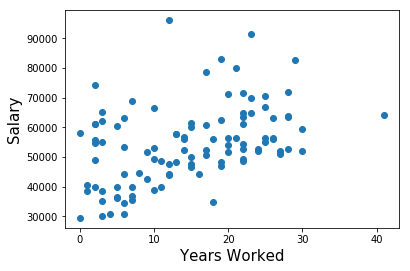

In [58]:
plt.scatter(x2,y2)
plt.xlabel('Years Worked', fontsize = 15)
plt.ylabel('Salary', fontsize = 15)
plt.show()

# Regression

In [79]:
x3 = sm.add_constant(x2)

In [82]:
x3 = sm.add_constant(x2)
 
results_test = sm.OLS(y2,x3).fit()
 
results_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     22.03
Date:                Fri, 17 May 2019   Prob (F-statistic):           8.45e-06
Time:                        14:07:17   Log-Likelihood:                -1111.5
No. Observations:                 103   AIC:                             2227.
Df Residuals:                     101   BIC:                             2232.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.548e+04   2225.314     20.436      0.000    4.11e+04    4.99e+04
yearsworked   601.9727    128.251      4.694      0.000     347.558     856.387
==============================================================================
Omnibus:                       17.502   Durbin-Watson:                   2.113
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.535
Skew:                           0.968   Prob(JB):                     3.47e-05
Kurtosis:                       4.019   Cond. No.                         33.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
results_test.params

const          45476.812967
yearsworked      601.972730
dtype: float64

# Visualization

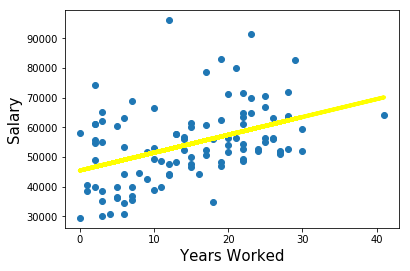

In [72]:
plt.scatter(x2,y2)
 
yhat = 601.972730*x2 + 45476.812967
 
fig = plt.plot(x2,yhat, lw=4, c='yellow', label = 'regression line')
 
plt.xlabel('Years Worked', fontsize = 15)
 
plt.ylabel('Salary', fontsize = 15)
 
plt.show()